# Carga de datos y librerias


> En esta seccion nos encargamos inicialmente de cargar las librerias que se van a usar para explorar los datos, seguido del dataset.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter


In [2]:
df = pd.read_excel('Assessment.xlsx', sheet_name='Data Ordenes')

# Exploracion general de los datos



> Verificar cuestiones generales, como lo es la el shape del dataset (columnas y filas), los tipos de valores que hay en las columnas, valores unicos por columnas (subcategorias) y una muestra de como se ven los datos con la funcion head



In [3]:
df.shape

(729, 8)



> El dataset tiene 729 filas y 8 columnas


In [4]:
df.dtypes

,0
Fecha,datetime64[ns]
Tipo de cliente,object
Ingresos netos,int64
Estado,object
Artículos vendidos,int64
Cupón(es),object
ID del Cliente,int64
Pedido #,int64




> Aqui se muestran los nombres de las columnas y el tipo de dato que son, por ejemplo: fecha es datetime, tipo cliente dice objeto en este caso quiere referirse a texto, lo mismo que cupon, ingresos netos un numero entero y asi los otros que tienen la descripcion de int64


In [5]:
df = df.rename(columns={
    'Fecha':              'fecha',
    'Tipo de cliente':    'tipo_de_cliente',
    'Ingresos netos':     'ingresos_netos',
    'Estado':             'estado',
    'Artículos vendidos': 'articulos_vendidos',
    'Cupón(es)':          'cupones',
    'ID del Cliente':     'id_del_cliente',
    'Pedido #':           'pedido_numero'
})




> Se procede a hacer un renombre en las columnas para que sea mas facil el manejo de datos, eliminando los espacios en blanco entre los caracteres


In [6]:
df.nunique().sort_values()

,0
tipo_de_cliente,2
estado,3
cupones,3
articulos_vendidos,28
fecha,631
ingresos_netos,725
pedido_numero,725
id_del_cliente,729




> Esto quiere decir que por ejemplo existen dos tipos de clientes, tres categorias en estado, tres tipos de cupones y asi sucesivamente


In [7]:
df.head()

,fecha,tipo_de_cliente,ingresos_netos,estado,articulos_vendidos,cupones,id_del_cliente,pedido_numero
0,2022-10-14 10:59:00,returning,64316,completed,1,NaN,1,25776
1,2022-10-14 12:43:00,returning,33392,completed,6,NaN,2,25782
2,2022-10-14 18:06:00,returning,43295,completed,1,cupon_autoship,3,25794
3,2022-10-14 18:08:00,returning,47465,completed,1,cupon_autoship,4,25795
4,2022-10-15 01:01:00,returning,28896,completed,2,cupon_autoship,5,25829




> Esto es una muestra de como se ven las primeras 5 lineas del dataset, la que sigue con la funcion sample es solo una muestra aleatoria de 5 del dataset


In [8]:
df.sample(5)

,fecha,tipo_de_cliente,ingresos_netos,estado,articulos_vendidos,cupones,id_del_cliente,pedido_numero
728,2022-11-30 21:31:00,new,48213,completed,1,cupon_autoship,729,31959
413,2022-11-30 19:14:00,new,26031,completed,2,NaN,414,31950
654,2022-11-27 19:05:00,returning,25431,completed,7,NaN,655,31248
566,2022-11-21 19:57:00,returning,76295,completed,7,NaN,567,30534
262,2022-10-19 13:16:00,new,15646,completed,2,NaN,263,26287


In [9]:
df_non_date = df.select_dtypes(exclude=['datetime64[ns]'])

df_non_date.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tipo_de_cliente,729,2,returning,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingresos_netos,729.0,NaN,NaN,NaN,47016.529492,18916.951605,15011.0,30189.0,47117.0,63429.0,79938.0
estado,729,3,completed,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
articulos_vendidos,729.0,NaN,NaN,NaN,6.529492,91.494502,0.0,1.0,2.0,3.0,2470.0
cupones,431,3,cupon_autoship,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_del_cliente,729.0,NaN,NaN,NaN,365.0,210.588461,1.0,183.0,365.0,547.0,729.0
pedido_numero,729.0,NaN,NaN,NaN,28767.190672,1777.662396,25776.0,27265.0,28774.0,30329.0,31959.0


1. Tipo de cliente

    count = 729: no hay valores faltantes.

    unique = 2: solo existen dos categorías, “new” y “returning”.

    top = returning (527 apariciones): el 72 % de los pedidos proviene de clientes recurrentes.

2. Ingresos netos

    count = 729: todas las órdenes tienen valor registrado.

    mean ≈ 47 016.53: ingreso neto promedio por pedido.

    std ≈ 18 916.95: La desviación estándar significa que los ingresos netos de los pedidos suelen variar alrededor del promedio (47 017) en ±18 917

    min = 15 011, 25 % = 30 189, 50 % = 47 117, 75 % = 63 429, max = 79 938.

3. Estado

    count = 729: sin valores faltantes.

    unique = 3: “completed”, “refunded” y “processing”.

    top = completed (719 apariciones): el 99 % de las órdenes se completaron exitosamente.

4. Artículos vendidos

    count = 729: todas las órdenes reportan unidades.

    mean ≈ 6.53: unidades promedio por pedido.

    std ≈ 91.49: alta variabilidad por outliers.

    min = 0: 4 pedidos sin artículos (todos “refunded”).

    25 % = 1, 50 % = 2, 75 % = 3, max = 2 470.

5. Cupón(es)

    count = 431: 298 pedidos sin cupón (NaN originales).

    unique = 3: “cupon_autoship”, “Sin_cupon”, “cupon_alianza”.

    top = cupon_autoship (366 apariciones).

6. ID del Cliente

    count = 729: sin valores faltantes.


7. Pedido

    count = 729: sin valores faltantes.



# Verificacion de anomalias en los datos.



> En esta seccion vamos a revisar datos faltantes, o sea nulos, vacios, duplicados, y cualquier tipo de inconsistencia



In [10]:
df.isnull().sum()

,0
fecha,0
tipo_de_cliente,0
ingresos_netos,0
estado,0
articulos_vendidos,0
cupones,298
id_del_cliente,0
pedido_numero,0


In [11]:
df[df['cupones'].isnull()]

,fecha,tipo_de_cliente,ingresos_netos,estado,articulos_vendidos,cupones,id_del_cliente,pedido_numero
0,2022-10-14 10:59:00,returning,64316,completed,1,NaN,1,25776
1,2022-10-14 12:43:00,returning,33392,completed,6,NaN,2,25782
7,2022-10-15 08:20:00,returning,69493,completed,2,NaN,8,25845
9,2022-10-22 16:36:00,new,30512,completed,23,NaN,10,26559
10,2022-11-17 21:13:00,new,58943,completed,22,NaN,11,29993
...,...,...,...,...,...,...,...,...
718,2022-11-30 11:33:00,new,26665,completed,1,NaN,719,31787
719,2022-11-30 16:53:00,returning,31444,completed,5,NaN,720,31851
722,2022-11-30 18:32:00,returning,54307,completed,2,NaN,723,31908
725,2022-11-30 13:10:00,new,55352,completed,1,NaN,726,31807


In [12]:
df['cupones'].unique()

array([nan, 'cupon_autoship', 'DEMO1', 'cupon_alianza'], dtype=object)

In [13]:
df['cupones'] = df['cupones'].fillna('Sin_cupon')

In [14]:
df['cupones'].isnull().sum()

np.int64(0)

In [15]:
df['cupones'].unique()

array(['Sin_cupon', 'cupon_autoship', 'DEMO1', 'cupon_alianza'],
      dtype=object)



> Tenemos 298 datos vacios en la seccion de cupones, esto es porque el dataset muestra que si no tiene cupon no hay ninguna descripcion, por lo que se añadio la subcategoria (sin_cupon) para eliminar esta inconsistencia



In [16]:
df.duplicated().sum()

np.int64(0)



> No se muestran datos duplicados



In [17]:
# Pedidos con 0 articulos vendidos
(df['articulos_vendidos'] == 0).sum()

np.int64(4)

In [18]:
df_zero = df[df['articulos_vendidos'] == 0]
df_zero

,fecha,tipo_de_cliente,ingresos_netos,estado,articulos_vendidos,cupones,id_del_cliente,pedido_numero
242,2022-10-31 22:19:00,returning,71782,refunded,0,Sin_cupon,243,26579
362,2022-11-07 16:26:00,returning,39813,refunded,0,Sin_cupon,363,27565
602,2022-11-23 12:32:00,returning,17849,refunded,0,Sin_cupon,603,27047
709,2022-11-30 10:35:00,returning,65022,refunded,0,Sin_cupon,710,30691


In [19]:
# ids de clientes de las ordenes anteriores con refunds y 0 articulos vendidos
ids_refund = df_zero['id_del_cliente'].unique()
ids_refund.tolist()

[243, 363, 603, 710]

In [20]:
# df de historial de esos ids cliente
historial_clientes = df[df['id_del_cliente'].isin(ids_refund)]

In [21]:
# verificar si existen mas ordenes con esos ids y en que fecha
historial_clientes.sort_values(['id_del_cliente', 'fecha'])

,fecha,tipo_de_cliente,ingresos_netos,estado,articulos_vendidos,cupones,id_del_cliente,pedido_numero
242,2022-10-31 22:19:00,returning,71782,refunded,0,Sin_cupon,243,26579
362,2022-11-07 16:26:00,returning,39813,refunded,0,Sin_cupon,363,27565
602,2022-11-23 12:32:00,returning,17849,refunded,0,Sin_cupon,603,27047
709,2022-11-30 10:35:00,returning,65022,refunded,0,Sin_cupon,710,30691




> A la hora de hacer una busqueda por ordenes con cero articulos vendidos se encontraron 4, estas son de clientes returning y refunded en su estado. Se buscan las ordenes originales para poder encontrar mas informacion, sin embargo no se encuentran dentro del dataset. Estas ordenes en si seran excluidas de los calculos de ventas efectivas.

In [22]:
# — Pedidos con ingresos netos negativos
(df['ingresos_netos'] < 0).sum()

np.int64(0)

In [23]:
# — Pedidos con ingresos netos exactamente cero
(df['ingresos_netos'] == 0).sum()

np.int64(0)



> Por otro lado, no hay ingresos netos negtivos, ni con valores iguales a cero.



In [24]:
# se crea una columna de True False para es refund
df['es_refund'] = df['estado'] == 'refunded'

In [25]:
# Checar que el estado sea true unicamente para refunded
df[['estado', 'es_refund']].drop_duplicates().reset_index(drop=True)

,estado,es_refund
0,completed,False
1,refunded,True
2,processing,False


In [26]:
df

,fecha,tipo_de_cliente,ingresos_netos,estado,articulos_vendidos,cupones,id_del_cliente,pedido_numero,es_refund
0,2022-10-14 10:59:00,returning,64316,completed,1,Sin_cupon,1,25776,False
1,2022-10-14 12:43:00,returning,33392,completed,6,Sin_cupon,2,25782,False
2,2022-10-14 18:06:00,returning,43295,completed,1,cupon_autoship,3,25794,False
3,2022-10-14 18:08:00,returning,47465,completed,1,cupon_autoship,4,25795,False
4,2022-10-15 01:01:00,returning,28896,completed,2,cupon_autoship,5,25829,False
...,...,...,...,...,...,...,...,...,...
724,2022-11-30 18:38:00,returning,59185,completed,4,cupon_alianza,725,31918,False
725,2022-11-30 13:10:00,new,55352,completed,1,Sin_cupon,726,31807,False
726,2022-11-30 19:00:00,returning,22491,completed,3,cupon_alianza,727,31939,False
727,2022-11-30 18:39:00,new,44579,completed,1,Sin_cupon,728,31923,False


## Resumen de KPIs

In [27]:
# Asegúrate de filtrar las devoluciones primero
df_sales = df[df['es_refund'] == False]

# Calcular KPIs
total_ordenes    = df_sales['pedido_numero'].nunique()
valor_neto_total = df_sales['ingresos_netos'].sum()
ticket_promedio  = df_sales.groupby('id_del_cliente')['ingresos_netos'].sum().mean()
pct_por_tipo     = df_sales['tipo_de_cliente'].value_counts(normalize=True)

# Mostrar cada uno explícitamente
print("Total de órdenes efectivas:", total_ordenes)
print("Valor neto total:", valor_neto_total)
print("Ticket promedio por cliente:", ticket_promedio)
print("Porcentaje de órdenes por tipo de cliente:\n", pct_por_tipo)


Total de órdenes efectivas: 722
Valor neto total: 33897389
Ticket promedio por cliente: 46949.29224376731
Porcentaje de órdenes por tipo de cliente:
 tipo_de_cliente
returning    0.720222
new          0.279778
Name: proportion, dtype: float64


## Evolución semanal del valor neto

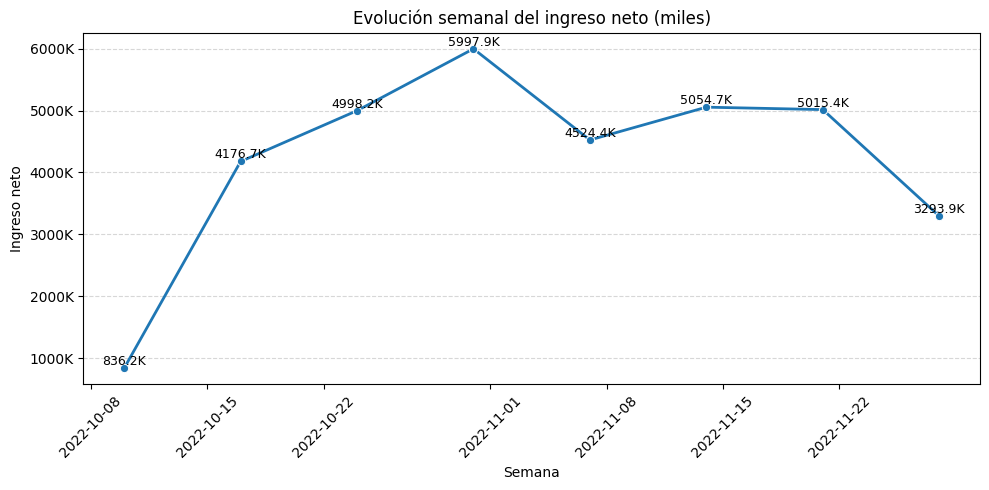

In [28]:
# 1. Filtrar ventas efectivas
df_sales = df[df['estado'] != 'refunded'].copy()

# 2. Preparar datos
df_sales['semana'] = df_sales['fecha'].dt.to_period('W').apply(lambda r: r.start_time)
weekly = df_sales.groupby('semana')['ingresos_netos'].sum().reset_index()
weekly['ingresos_k'] = weekly['ingresos_netos'] / 1000  # convertir a miles

# 3. Función para formatear eje Y en miles ("K")
formatter = FuncFormatter(lambda x, pos: f'{int(x)}K')

# 4. Gráfico con etiquetas de valor
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=weekly, x='semana', y='ingresos_k', marker='o', linewidth=2)
ax.yaxis.set_major_formatter(formatter)

# Añadir etiqueta con el valor encima de cada punto (fontsize como entero)
for x, y in zip(weekly['semana'], weekly['ingresos_k']):
    ax.text(
        x, y + 0.5,        # Desplazamiento vertical
        f'{y:.1f}K',       # Texto formateado
        ha='center',       # Alineación horizontal
        va='bottom',       # Alineación vertical
        fontsize=9         # Tamaño de fuente como entero
    )

plt.title('Evolución semanal del ingreso neto (miles)')
plt.xlabel('Semana')
plt.ylabel('Ingreso neto')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## WoW

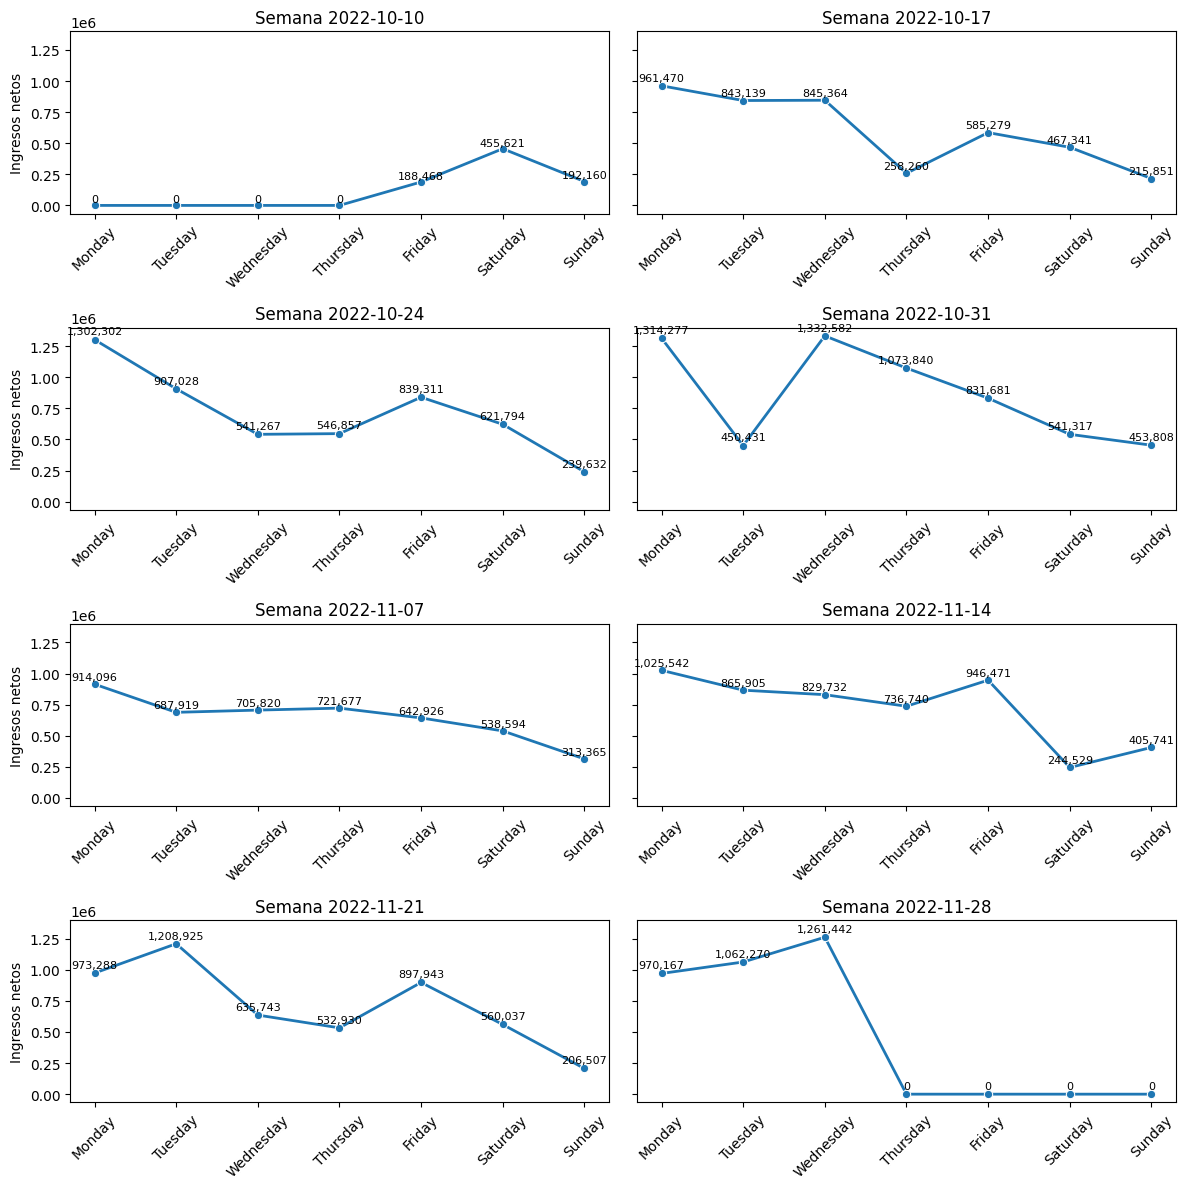

In [29]:

# 1. Filtrar ventas efectivas y preparar df_sales
df_sales = df[df['estado'] != 'refunded'].copy()
df_sales['semana']     = df_sales['fecha'].dt.to_period('W').apply(lambda r: r.start_time)
df_sales['dia_nombre'] = df_sales['fecha'].dt.day_name()

# 2. Definir el orden natural de los días
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# 3. Convertir a categoría ordenada
df_sales['dia_nombre'] = pd.Categorical(
    df_sales['dia_nombre'],
    categories=weekday_order,
    ordered=True
)

# 4. Agrupar por semana y día
weekly_daily = (
    df_sales
    .groupby(['semana','dia_nombre'])['ingresos_netos']
    .sum()
    .reset_index()
)

# 5. Dibujar small multiples con el orden correcto en el eje X
semanas = sorted(weekly_daily['semana'].unique())
cols = 2
rows = (len(semanas) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, rows*3), sharey=True)
axes = axes.flatten()

for ax, semana in zip(axes, semanas):
    data = weekly_daily[weekly_daily['semana']==semana]
    sns.lineplot(
        data=data,
        x='dia_nombre',
        y='ingresos_netos',
        marker='o',
        linewidth=2,
        ax=ax
    )
    ax.set_title(f'Semana {semana.date()}')
    ax.set_xlabel('')
    ax.set_ylabel('Ingresos netos')
    ax.tick_params(axis='x', rotation=45)

    # Etiquetas de valor
    for x, y in zip(data['dia_nombre'], data['ingresos_netos']):
        ax.text(
            x, y + data['ingresos_netos'].max()*0.02,
            f'{y:,.0f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

# Ocultar ejes sobrantes
for ax in axes[len(semanas):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


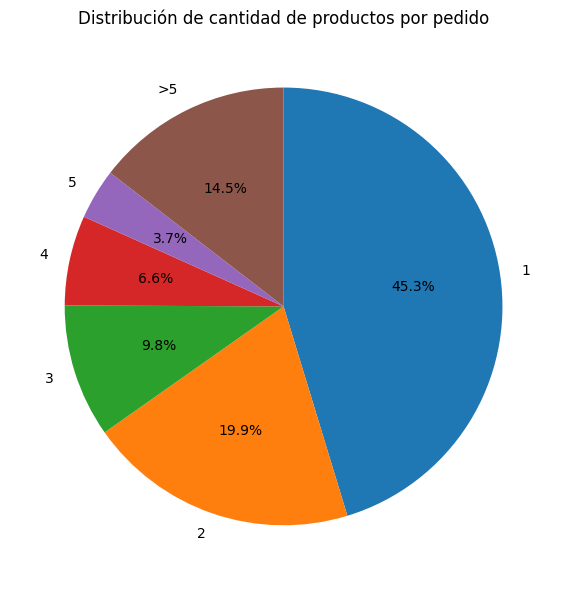

In [30]:

df_sales = df[df['estado'] != 'refunded'].copy()

# 2. Calcular frecuencia de artículos por pedido
freq = df_sales['articulos_vendidos'].value_counts().sort_index()

# 3. Agrupar categorías menores en “Otros” (por ejemplo, >5)
top_n = 5
main = freq[freq.index <= top_n]
others = freq[freq.index > top_n].sum()
main[f'>{top_n}'] = others

# 4. Pie chart
labels = main.index.astype(str)
sizes  = main.values

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False
)
plt.title('Distribución de cantidad de productos por pedido')
plt.tight_layout()
plt.show()


       tipo_cupon  n_ordenes  pct_ordenes
0  cupon_autoship        364    50.415512
1       Sin_cupon        293    40.581717
2   cupon_alianza         39     5.401662
3           DEMO1         26     3.601108


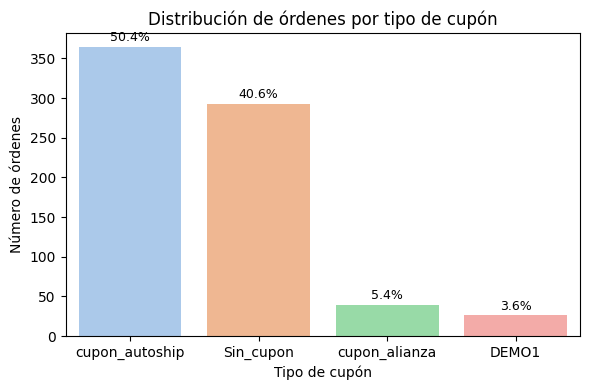

In [31]:
# 1. Filtrar ventas efectivas
df_sales = df[df['estado'] != 'refunded'].copy()

# 2. Asegurarse de que 'cupones' no tenga NaN
df_sales['cupones'] = df_sales['cupones'].fillna('Sin_cupon')

# 3. Calcular frecuencia de cada tipo de cupón
freq_cupon = df_sales['cupones'].value_counts().reset_index()
freq_cupon.columns = ['tipo_cupon', 'n_ordenes']

# 4. Calcular porcentaje
freq_cupon['pct_ordenes'] = 100 * freq_cupon['n_ordenes'] / freq_cupon['n_ordenes'].sum()

# 5. Mostrar tabla de conteos y porcentajes
print(freq_cupon)

# 6. Gráfico de barras con porcentajes anotados
plt.figure(figsize=(6,4))
ax = sns.barplot(
    data=freq_cupon,
    x='tipo_cupon',
    y='n_ordenes',
    palette='pastel'
)
plt.title('Distribución de órdenes por tipo de cupón')
plt.xlabel('Tipo de cupón')
plt.ylabel('Número de órdenes')
for i, row in freq_cupon.iterrows():
    ax.text(
        i, row['n_ordenes'] + freq_cupon['n_ordenes'].max()*0.01,
        f"{row['pct_ordenes']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9
    )
plt.tight_layout()
plt.show()


## Cantidad de ordenes por estado

Distribución de órdenes por estado:
       estado  n_ordenes        pct
0   completed        719  98.628258
1    refunded          7   0.960219
2  processing          3   0.411523


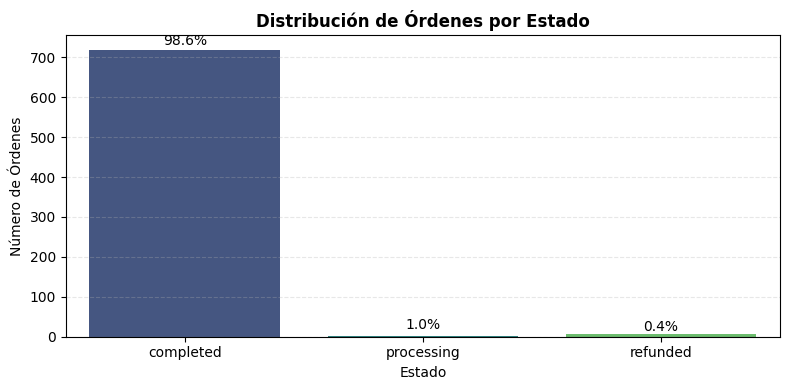

In [32]:
# 1. Conteo de órdenes por estado
estado_counts = df['estado'].value_counts().reset_index()
estado_counts.columns = ['estado', 'n_ordenes']
estado_counts['pct'] = 100 * estado_counts['n_ordenes'] / estado_counts['n_ordenes'].sum()

# 2. Mostrar tabla
print("Distribución de órdenes por estado:")
print(estado_counts)

# 3. Gráfico de barras
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=estado_counts,
    x='estado',
    y='n_ordenes',
    palette='viridis',
    order=['completed', 'processing', 'refunded']  # Orden personalizado
)

# 4. Añadir etiquetas de porcentaje
for i, row in estado_counts.iterrows():
    ax.text(
        i,
        row['n_ordenes'] + 5,  # Offset vertical
        f"{row['pct']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Distribución de Órdenes por Estado', fontweight='bold')
plt.xlabel('Estado')
plt.ylabel('Número de Órdenes')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

  cupón_label tipo_de_cliente  n_ordenes
0   Con cupón             new         77
1   Con cupón       returning        352
2   Sin cupón             new        125
3   Sin cupón       returning        168


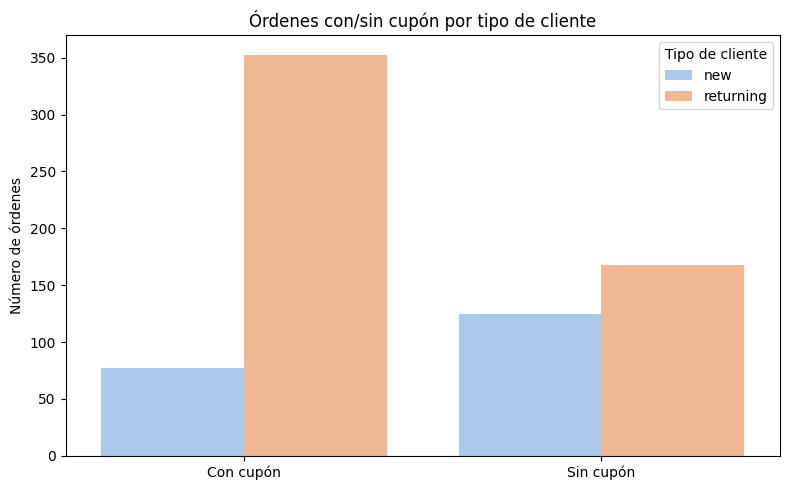

In [33]:

df_sales = df[df['estado'] != 'refunded'].copy()

# 2. Asegurar que no hay NaN en cupones y crear flag
df_sales['cupones'] = df_sales['cupones'].fillna('Sin_cupon')
df_sales['usa_cupon'] = df_sales['cupones'] != 'Sin_cupon'

# 3. Mapear usa_cupon a etiquetas más legibles
df_sales['cupón_label'] = df_sales['usa_cupon'].map({True: 'Con cupón', False: 'Sin cupón'})

# 4. Tabla de conteo por cupón y tipo de cliente
tabla = (
    df_sales
    .groupby(['cupón_label','tipo_de_cliente'])
    .size()
    .reset_index(name='n_ordenes')
)

print(tabla)

# 5. Gráfico de barras con hue por tipo de cliente
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tabla,
    x='cupón_label',
    y='n_ordenes',
    hue='tipo_de_cliente',
    palette='pastel'
)
plt.title('Órdenes con/sin cupón por tipo de cliente')
plt.xlabel('')
plt.ylabel('Número de órdenes')
plt.legend(title='Tipo de cliente')
plt.tight_layout()
plt.show()


# Seccion 2, Insights comportamiento

## ¿Qué tipo de cliente (new vs returning) genera mayor valor neto por orden?

Comparación de Valor Neto por Tipo de Cliente:


,Número de Órdenes,Valor Promedio por Orden,Mediana de Valor,Desviación Estándar,Valor Total Generado
tipo_de_cliente,,,,,
new,201,"$47,031","$45,157","$18,855","$9,453,311"
returning,518,"$46,889","$47,744","$18,916","$24,288,636"


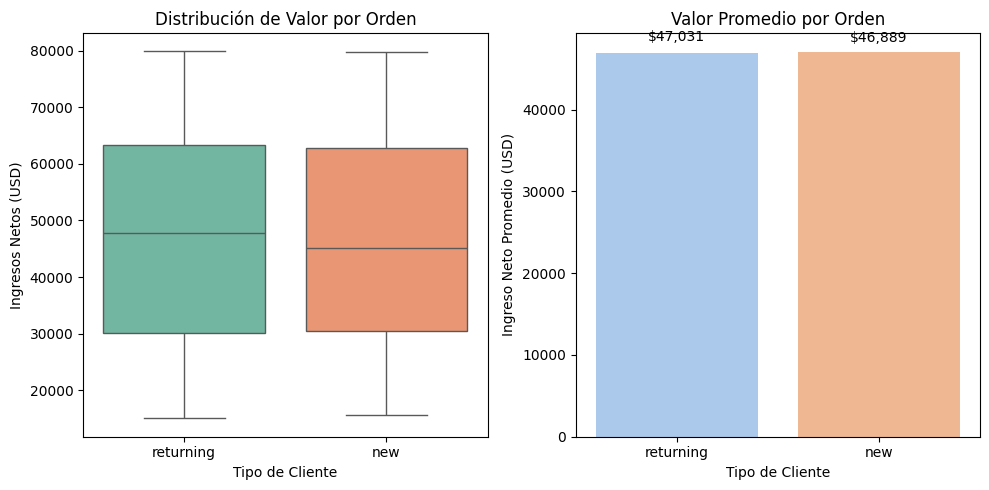


Prueba T (diferencia de medias): p-value = 0.9278
→ La diferencia NO es estadísticamente significativa


In [34]:
# 1. Filtrar solo órdenes completadas (excluyendo refunded y processing)
df_completed = df[df['estado'] == 'completed'].copy()

# 2. Calcular métricas clave por tipo de cliente
metrics = df_completed.groupby('tipo_de_cliente')['ingresos_netos'].agg(
    ['count', 'mean', 'median', 'std', 'sum']
).rename(columns={
    'count': 'Número de Órdenes',
    'mean': 'Valor Promedio por Orden',
    'median': 'Mediana de Valor',
    'std': 'Desviación Estándar',
    'sum': 'Valor Total Generado'
})

# 3. Formatear los números para mejor visualización
metrics_formatted = metrics.style.format({
    'Valor Promedio por Orden': '${:,.0f}',
    'Mediana de Valor': '${:,.0f}',
    'Desviación Estándar': '${:,.0f}',
    'Valor Total Generado': '${:,.0f}'
})

# Mostrar tabla comparativa
print("Comparación de Valor Neto por Tipo de Cliente:")
display(metrics_formatted)

# 4. Visualización
plt.figure(figsize=(10, 5))

# Boxplot para distribución
plt.subplot(1, 2, 1)
sns.boxplot(
    data=df_completed,
    x='tipo_de_cliente',
    y='ingresos_netos',
    palette='Set2'
)
plt.title('Distribución de Valor por Orden')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ingresos Netos (USD)')

# Gráfico de barras para comparación de promedios
plt.subplot(1, 2, 2)
sns.barplot(
    data=df_completed,
    x='tipo_de_cliente',
    y='ingresos_netos',
    estimator='mean',
    ci=None,
    palette='pastel'
)
plt.title('Valor Promedio por Orden')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Ingreso Neto Promedio (USD)')

# Añadir etiquetas de valor
avg_values = df_completed.groupby('tipo_de_cliente')['ingresos_netos'].mean()
for i, value in enumerate(avg_values):
    plt.text(i, value + 1000, f'${value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

new = df_completed[df_completed['tipo_de_cliente'] == 'new']['ingresos_netos']
returning = df_completed[df_completed['tipo_de_cliente'] == 'returning']['ingresos_netos']

t_stat, p_value = stats.ttest_ind(new, returning, equal_var=False)
print(f"\nPrueba T (diferencia de medias): p-value = {p_value:.4f}")
if p_value < 0.05:
    print("→ La diferencia es estadísticamente significativa (p < 0.05)")
else:
    print("→ La diferencia NO es estadísticamente significativa")

In [43]:
pedidos_por_cliente = df_sales.groupby(['tipo_de_cliente', 'id_del_cliente']).size()

new_freq = pedidos_por_cliente['new'].mean()
returning_freq = pedidos_por_cliente['returning'].mean()

print(f"Pedidos promedio por cliente NEW: {new_freq}")
print(f"Pedidos promedio por cliente RETURNING: {returning_freq}")

Pedidos promedio por cliente NEW: 1.0
Pedidos promedio por cliente RETURNING: 1.0


¿Hay diferencias en el valor neto o cantidad de artículos entre quienes usan cupones y quienes no?

       label  ingresos_netos
0  Sin cupón    45536.825939
1  Con cupón    47913.983683


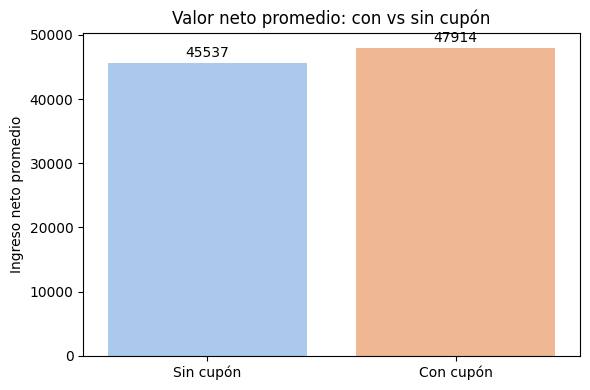

In [35]:
# 1. Filtrar ventas efectivas
df_sales = df[df['estado'] != 'refunded'].copy()
df_sales['cupones'] = df_sales['cupones'].fillna('Sin_cupon')
df_sales['usa_cupon'] = df_sales['cupones'] != 'Sin_cupon'

# 2. Calcular ticket promedio por grupo
avg_net = df_sales.groupby('usa_cupon')['ingresos_netos'].mean().reset_index()
avg_net['label'] = avg_net['usa_cupon'].map({True: 'Con cupón', False: 'Sin cupón'})

# 3. Mostrar los valores en consola
print(avg_net[['label','ingresos_netos']])

# 4. Gráfico de barras
plt.figure(figsize=(6,4))
ax = sns.barplot(data=avg_net, x='label', y='ingresos_netos', palette='pastel')
plt.title('Valor neto promedio: con vs sin cupón')
plt.xlabel('')
plt.ylabel('Ingreso neto promedio')
for i, row in avg_net.iterrows():
    ax.text(i, row['ingresos_netos'] + avg_net['ingresos_netos'].max()*0.01,
            f"{row['ingresos_netos']:.0f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


¿Cuál es el promedio de artículos por orden según el estado de la orden? ¿Detectás alguna anomalía?

       estado  promedio_articulos
0   completed            6.588317
1  processing            2.333333
2    refunded            2.285714


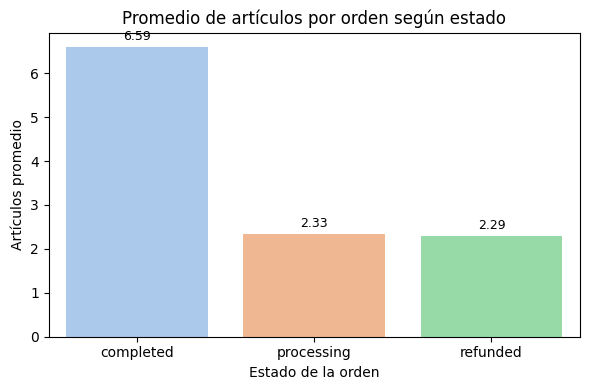

In [36]:
avg_articles_by_state = (
    df
    .groupby('estado')['articulos_vendidos']
    .mean()
    .reset_index()
    .rename(columns={'articulos_vendidos': 'promedio_articulos'})
)

print(avg_articles_by_state)

# 3. Graficar para visualizar posibles anomalías
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(
    data=avg_articles_by_state,
    x='estado',
    y='promedio_articulos',
    palette='pastel'
)
plt.title('Promedio de artículos por orden según estado')
plt.xlabel('Estado de la orden')
plt.ylabel('Artículos promedio')
for i, row in avg_articles_by_state.iterrows():
    plt.text(
        i,
        row['promedio_articulos'] + 0.1,
        f"{row['promedio_articulos']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9
    )
plt.tight_layout()
plt.show()

¿Que notas de los clientes Returning?

In [37]:
df['cupones'] = df['cupones'].fillna('Sin_cupon')
df['usa_cupon'] = df['cupones'] != 'Sin_cupon'
df['es_refund'] = df['estado'] == 'refunded'

# 2. Filtrar ventas efectivas y returning
df_sales = df[~df['es_refund']]
df_return = df_sales[df_sales['tipo_de_cliente'] == 'returning']

# 3. Calculos clave para returning
pct_orders_return   = df_return['pedido_numero'].nunique() / df_sales['pedido_numero'].nunique() * 100
pct_revenue_return  = df_return['ingresos_netos'].sum() / df_sales['ingresos_netos'].sum() * 100
coupon_usage_return = df_return['usa_cupon'].mean() * 100
avg_order_value     = df_return['ingresos_netos'].mean()
avg_articles        = df_return['articulos_vendidos'].mean()
state_dist_return   = df_return['estado'].value_counts(normalize=True) * 100

# 4. Mostrar métricas
print(f"% de órdenes returning: {pct_orders_return:.1f}%")
print(f"% de ingresos returning: {pct_revenue_return:.1f}%")
print(f"% uso de cupón (returning): {coupon_usage_return:.1f}%")
print(f"Ticket promedio (returning): {avg_order_value:.0f}")
print(f"Artículos promedio (returning): {avg_articles:.2f}")
print("Distribución de estados (returning):")
print(state_dist_return)

% de órdenes returning: 72.0%
% de ingresos returning: 72.0%
% uso de cupón (returning): 67.7%
Ticket promedio (returning): 46929
Artículos promedio (returning): 3.22
Distribución de estados (returning):
estado
completed     99.615385
processing     0.384615
Name: proportion, dtype: float64


In [38]:
# Filtrar ventas efectivas y returning
df_sales  = df[~df['es_refund']]
df_return = df_sales[df_sales['tipo_de_cliente'] == 'returning']

# Calcular métricas
metrics = {
    "Métrica": [
        "% Órdenes returning",
        "% Ingresos returning",
        "% Uso de cupón (returning)",
        "Ticket promedio (returning)",
        "Artículos promedio (returning)"
    ],
    "Valor": [
        df_return['pedido_numero'].nunique() / df_sales['pedido_numero'].nunique() * 100,
        df_return['ingresos_netos'].sum()   / df_sales['ingresos_netos'].sum()   * 100,
        df_return['usa_cupon'].mean()       * 100,
        df_return['ingresos_netos'].mean(),
        df_return['articulos_vendidos'].mean()
    ]
}

# Crear el DataFrame resumen
summary_df = pd.DataFrame(metrics)

# Formatear los valores
summary_df["Valor"] = summary_df.apply(
    lambda row: f"{row['Valor']:.1f}%" if "%" in row["Métrica"] else f"{row['Valor']:.2f}",
    axis=1
)

# Mostrar la tabla
summary_df


,Métrica,Valor
0,% Órdenes returning,72.0%
1,% Ingresos returning,72.0%
2,% Uso de cupón (returning),67.7%
3,Ticket promedio (returning),46929.22
4,Artículos promedio (returning),3.22


## Caso 1


¿Qué porcentaje de las órdenes utilizan cupones? ¿Cuál tipo de cupón es el más frecuente?
¿Qué patrón encontrás en las órdenes reembolsadas? (¿hay concentración por tipo de cliente, uso de cupones o cantidad de artículos?)
¿Qué 2 acciones recomendarías al equipo comercial con base en tu análisis?


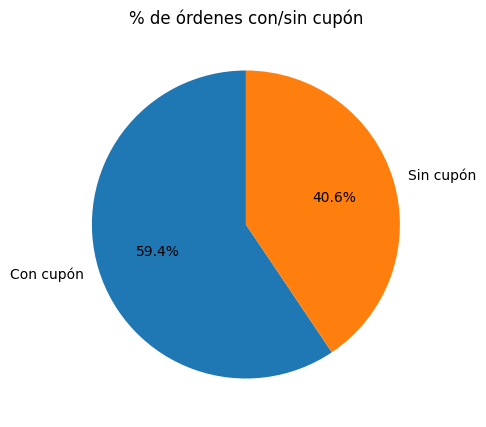

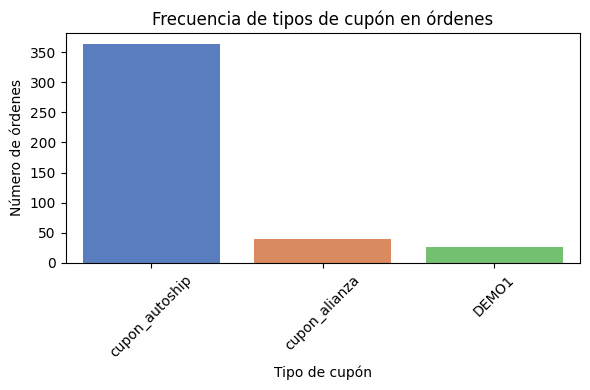

In [39]:

df = df.rename(columns={
    'Fecha': 'fecha',
    'Tipo de cliente': 'tipo_de_cliente',
    'Ingresos netos': 'ingresos_netos',
    'Estado': 'estado',
    'Artículos vendidos': 'articulos_vendidos',
    'Cupón(es)': 'cupones',
    'ID del Cliente': 'id_del_cliente',
    'Pedido #': 'pedido_numero'
})

df['cupones'] = df['cupones'].fillna('Sin_cupon')
df['usa_cupon'] = df['cupones'] != 'Sin_cupon'
df['es_refund'] = df['estado'] == 'refunded'

# Ventas efectivas
df_sales = df[~df['es_refund']].copy()

# Devoluciones
df_refunds = df[df['es_refund']].copy()

# % Órdenes co y sin cupon
counts = df_sales['usa_cupon'].value_counts()
labels = ['Con cupón','Sin cupón']
sizes  = [counts[True], counts[False]]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('% de órdenes con/sin cupón')
plt.show()

# Barplot de frecuencia de cada tipo de cupon
cupon_counts = df_sales[df_sales['usa_cupon']]['cupones'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=cupon_counts.index, y=cupon_counts.values, palette='muted')
plt.title('Frecuencia de tipos de cupón en órdenes')
plt.xlabel('Tipo de cupón')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


       label  ingresos_netos
0  Sin cupón    45536.825939
1  Con cupón    47913.983683


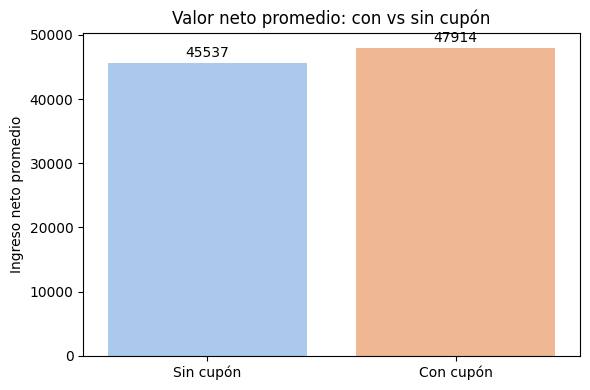

In [40]:
# 1. Filtrar ventas efectivas
df_sales = df[df['estado'] != 'refunded'].copy()
df_sales['cupones'] = df_sales['cupones'].fillna('Sin_cupon')
df_sales['usa_cupon'] = df_sales['cupones'] != 'Sin_cupon'

# 2. Calcular ticket promedio por grupo
avg_net = df_sales.groupby('usa_cupon')['ingresos_netos'].mean().reset_index()
avg_net['label'] = avg_net['usa_cupon'].map({True: 'Con cupón', False: 'Sin cupón'})

# 3. Mostrar los valores en consola
print(avg_net[['label','ingresos_netos']])

# 4. Gráfico de barras
plt.figure(figsize=(6,4))
ax = sns.barplot(data=avg_net, x='label', y='ingresos_netos', palette='pastel')
plt.title('Valor neto promedio: con vs sin cupón')
plt.xlabel('')
plt.ylabel('Ingreso neto promedio')
for i, row in avg_net.iterrows():
    ax.text(i, row['ingresos_netos'] + avg_net['ingresos_netos'].max()*0.01,
            f"{row['ingresos_netos']:.0f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


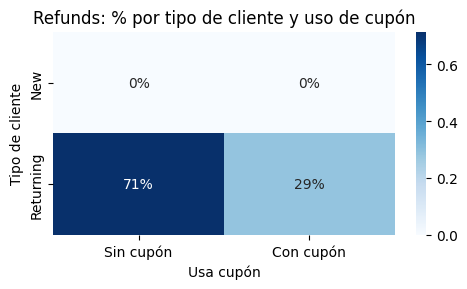

In [41]:
# Filtrar refunds
df_refunds = df[df['estado']=='refunded'].copy()
df_refunds['usa_cupon'] = df_refunds['cupones'].fillna('Sin_cupon') != 'Sin_cupon'

# 2. Crosstab normalizado
tipos = ['new','returning']
usos  = [False, True]

ct = pd.crosstab(
    df_refunds['tipo_de_cliente'],
    df_refunds['usa_cupon'],
    normalize='index'
).reindex(index=tipos, columns=usos, fill_value=0)

# 3. Heatmap
plt.figure(figsize=(5,3))
sns.heatmap(ct, annot=True, fmt='.0%', cmap='Blues',
            xticklabels=['Sin cupón','Con cupón'],
            yticklabels=['New','Returning'])
plt.title('Refunds: % por tipo de cliente y uso de cupón')
plt.xlabel('Usa cupón')
plt.ylabel('Tipo de cliente')
plt.tight_layout()
plt.show()


## Las respuestas del CASO 2 Y 3 se encuentran dentro de esta pagina que desplegue para la visualizacion.

https://assessment-tobidashboard.streamlit.app/
